# Well, Well Wellness Aps :
A comparative analysis of top 5 grossing health/wellness apps - customer clustering and sentiment analysis using NLP to develop language descriptors for best and worst app reviews to inform what is going well and what could be improved in the world of wellness apps. 

# Obtain:

Inspired by: https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/ SEVERAL copies of this same project exist in various formats by various authors.

going to App Annie and looking at top grossing wellness apps:
https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=

In [1]:
#!pip install google_play_scraper

In [2]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

## Top 5 Wellness Apps:

According to [appannie](https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=), the top five grossing wellness apps on July 1 for the google play store in order:

1. Calm
* MyFitnessPal
* Headspace
* Me
* Fitbit

Rankings change daily.

Data on each package was obtained using [google play scraper](https://pypi.org/project/google-play-scraper/). Overviews of each app can be observed below:

In [3]:
#creating a list of top apps based on their google play app id

app_packages = [
    'com.calm.android',
    'com.myfitnesspal.android',
    'com.getsomeheadspace.android', 
    'com.gen.workoutme',
    'com.fitbit.FitbitMobile'
]

In [4]:
#obtaining information on each app and descriptive history using google_play_scraper api
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


In [5]:
app_infos_df = pd.DataFrame.from_records(app_infos)


In [6]:
#app_infos_df.to_csv('app_infos_71020')
#saved file since every download grabs different data

##  App Descriptions and Summaries below:

In [7]:
app_infos_df

title  \
0   Calm - Meditate, Sleep, Relax   
1  Calorie Counter - MyFitnessPal   
2   Headspace: Meditation & Sleep   
3  BetterMe: Home Workouts & Diet   
4                          Fitbit   

                                         description  \
0  Calm is a leading app for meditation and sleep...   
1  Whether you want to lose weight, tone up, get ...   
2  Learn the life-changing skills of meditation i...   
3  BetterMe: Home Workouts & Diet To Lose Weight ...   
4  Start a free 90-day trial of Fitbit Premium fo...   

                                     descriptionHTML  \
0  Calm is a leading app for meditation and sleep...   
1  Whether you want to lose weight, tone up, get ...   
2  Learn the life-changing skills of meditation i...   
3  BetterMe: Home Workouts &amp; Diet To Lose Wei...   
4  Start a free 90-day trial of Fitbit Premium fo...   

                                             summary  \
0  Join the millions discovering the life-changin...   
1  Lose weight with MyFitnessPal, the easiest cal...   
2  Meditation and mindfulness in just a few minut...   
3  Weight Loss Workout: Abs, Butt, Legs and Whole...   
4  Fitbit is dedicated to helping people lead hea...   

                                         summaryHTML     installs  \
0  Join the millions discovering the life-changin...  10,000,000+   
1  Lose weight with MyFitnessPal, the easiest cal...  50,000,000+   
2  Meditation and mindfulness in just a few minut...  10,000,000+   
3  Weight Loss Workout: Abs, Butt, Legs and Whole...  10,000,000+   
4  Fitbit is dedicated to helping people lead hea...  50,000,000+   

   minInstalls     score  ratings  reviews  ... contentRatingDescription  \
0     10000000  4.393263   269685    91236  ...                     None   
1     50000000  4.444827  2304147   806764  ...                     None   
2     10000000  3.469160   133624    54267  ...                     None   
3     10000000  4.203207    77237    29720  ...                     None   
4     50000000  3.759324   668153   305699  ...                     None   

   adSupported  containsAds      released     updated             version  \
0         None         None  Jul 30, 2014  1594106391  Varies with device   
1         True         True  Apr 26, 2010  1594139530  Varies with device   
2         None         None   Jan 6, 2012  1594320031               4.2.1   
3         None         None  Jul 27, 2017  1594311199               3.9.0   
4         None         None  Mar 16, 2012  1594060323  Varies with device   

                                       recentChanges  \
0  As always, you can expect an original Daily Ca...   
1  Whether you want to log your lowest weight in ...   
2  The latest release features a fresh all-new lo...   
3            Bug fixes and performance improvements.   
4            *Bug fixes and performance improvements   

                                   recentChangesHTML  \
0  As always, you can expect an original Daily Ca...   
1  Whether you want to log your lowest weight in ...   
2  The latest release features a fresh all-new lo...   
3            Bug fixes and performance improvements.   
4            *Bug fixes and performance improvements   

                          appId  \
0              com.calm.android   
1      com.myfitnesspal.android   
2  com.getsomeheadspace.android   
3             com.gen.workoutme   
4       com.fitbit.FitbitMobile   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  
2  https://play.google.com/store/apps/details?id=...  
3  https://play.google.com/store/apps/details?id=...  
4  https://play.google.com/store/apps/details?id=...  

[5 rows x 47 columns]

A helper function from the inspiration project to read .json files: 

In [8]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str)
    #cool feature to help highlight specificied string
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [9]:
print_json(app_infos[4])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.fitbit.FitbitMobile",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. \r\n\r\nSay hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. \r\n\r\nA free app that tracks your day & progress over time\r\nFind free workouts, nutrition programs, meditation tracks, sleep tools & more \r\nConnect with fr

In [10]:
app_packages[0]

'com.calm.android'

### logos:

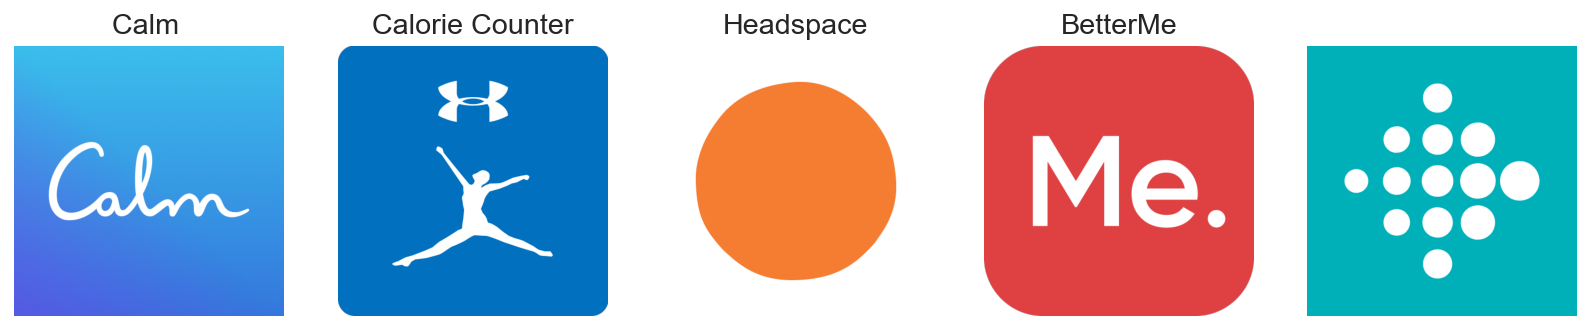

In [11]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
        return title[:15]
fig, axs = plt.subplots(1,5,figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

### Obtaining app reviews:

In [12]:
help(reviews)

Help on function reviews in module google_play_scraper.features.reviews:

reviews(app_id, lang=None, country=None, sort=None, count=None, filter_score_with=None, continuation_token=None)



In [13]:
#looking at reviews function and learning...
calm, continuation_token = reviews('com.calm.android', lang='en', country='us',sort=Sort.MOST_RELEVANT, count=3)
calm

[{'reviewId': 'gp:AOqpTOEVrkdHF8x6kk7t7rESpoSzsk2yY3I5b19zS_Pla_IqU1Xou-RAphhSoikf9D0V0yoRFaIYwYsGy9JRaQ',
  'userName': 'Nathan T.',
  'userImage': 'https://lh3.googleusercontent.com/-_gIxpXuntNI/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmI0s67Has6CCIjJHPJDHdthC_lJQ/photo.jpg',
  'content': "Not sure why the low reviews. But this is a really good all around app. It's not entirely focused on meditation, but it is good for it. It's also focused on sleep with sleep stories and music, which is what I use it for. I think the meditation lessons are a bit more difficult for beginners than Headspace, so that's where Headspace gets the +1. But I love that for the same price, you get these other sleep sounds and music",
  'score': 5,
  'thumbsUpCount': 146,
  'reviewCreatedVersion': '4.29',
  'at': datetime.datetime(2020, 7, 7, 21, 5, 20),
  'replyContent': None,
  'repliedAt': None},
 {'reviewId': 'gp:AOqpTOF0bECk3ndWQSA92hRJJtPPixUf_RP7Zz41RJbVLRXZyZKa8pGohG6SaSUQMbZIDPmwgAeJHNnw22RgKA',
  'userName': "S

saving for api usage: 
https://github.com/JoMingyu/google-play-scraper

better than this one: 
https://github.com/facundoolano/google-play-scraper#reviews


In [14]:
#iterating through each of the app packages to grab reviews on each grabbing 10K each based on relevance
results = []
for ap in tqdm(app_packages):
    result, continuation_token = reviews(
    ap,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT SQL-like calls
    count = 10000, # defaults to 100, returns number of records you want
    filter_score_with=None) # defaults to None(means all score) might be usefull to scrape some more low scores if needed
    
    for a in result:
        a['application'] = ap #tracking which app we grabbed review of
        
    results.extend(result)

100%|██████████| 5/5 [02:30<00:00, 30.01s/it]


In [15]:
len(results)

50000

In [16]:
#creating files to work from and .csv if needed
app_reviews_df = pd.DataFrame(results)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

## Data Description

|**Field**  | **Description**|
|--|--|
|ReviewId | a unique identifier for each review|
|userName  | Name of user that reviewed the product|
|userImage | User avatar??? (need to explore)|
|content | The text supporting the stars assigned at the review|
|thumbsUpCount | count of how many other users appreciated the review (helps for relevance)|
|reviewCreatedVersion | The version of the app being reviewed|
|at | the review date
|replyContent | Text/content if there is a reply to a review from the app administrators|
|repliedAt | Timestamp for the replyContent field
|application| the app being reviewed


In [17]:
app_reviews_df.head()

reviewId       userName  \
0  gp:AOqpTOEVrkdHF8x6kk7t7rESpoSzsk2yY3I5b19zS_P...      Nathan T.   
1  gp:AOqpTOF0bECk3ndWQSA92hRJJtPPixUf_RP7Zz41RJb...  Sarah O'Brien   
2  gp:AOqpTOHUTVcw-ouWoorI96L8XfZuk8LQk7BwgyOkyKM...   crissy verce   
3  gp:AOqpTOGuUIVguGn6YlWqfQS1GzeGXYwfvu20xPNzXfO...          Jason   
4  gp:AOqpTOFuuTaHyzeTDn_OMc8aJdsIwGiQ2O7zB-f7I-u...      Glenneroo   

                                           userImage  \
0  https://lh3.googleusercontent.com/-_gIxpXuntNI...   
1  https://lh3.googleusercontent.com/-z7GRy79xifU...   
2  https://lh3.googleusercontent.com/-f4i3Mx6-zBo...   
3  https://lh3.googleusercontent.com/-uMFWfRprqxs...   
4  https://lh3.googleusercontent.com/a-/AOh14GgIF...   

                                             content  score  thumbsUpCount  \
0  Not sure why the low reviews. But this is a re...      5            146   
1  I signed up for the yearly service, which was ...      1            420   
2  This app is actually causing more stress. I've...      1            169   
3  I like all if the different categories to choo...      2              6   
4  Can't even try the app without creating a logi...      1             21   

  reviewCreatedVersion                  at replyContent repliedAt  \
0                 4.29 2020-07-07 21:05:20         None       NaT   
1                 4.29 2020-07-06 20:35:19         None       NaT   
2                 4.29 2020-07-08 00:27:42         None       NaT   
3                 4.29 2020-07-10 23:34:43         None       NaT   
4                 4.29 2020-07-07 19:32:31         None       NaT   

        application  
0  com.calm.android  
1  com.calm.android  
2  com.calm.android  
3  com.calm.android  
4  com.calm.android

# Scrub / Clean

In [18]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    45302 non-null object
at                      50000 non-null datetime64[ns]
replyContent            19496 non-null object
repliedAt               19496 non-null datetime64[ns]
application             50000 non-null object
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


**Target value counts:**

In [89]:
app_reviews_df['score'].value_counts()

5    20554
1    13843
4     6650
3     4539
2     4414
Name: score, dtype: int64

**Observation:** The intentional choice to select the most relevant reviews has paid off, it's good to see not as imbalanced as in cases past.  :-P  'will need to look into missing data.

### Missing Data:

In [19]:
import missingno as msno

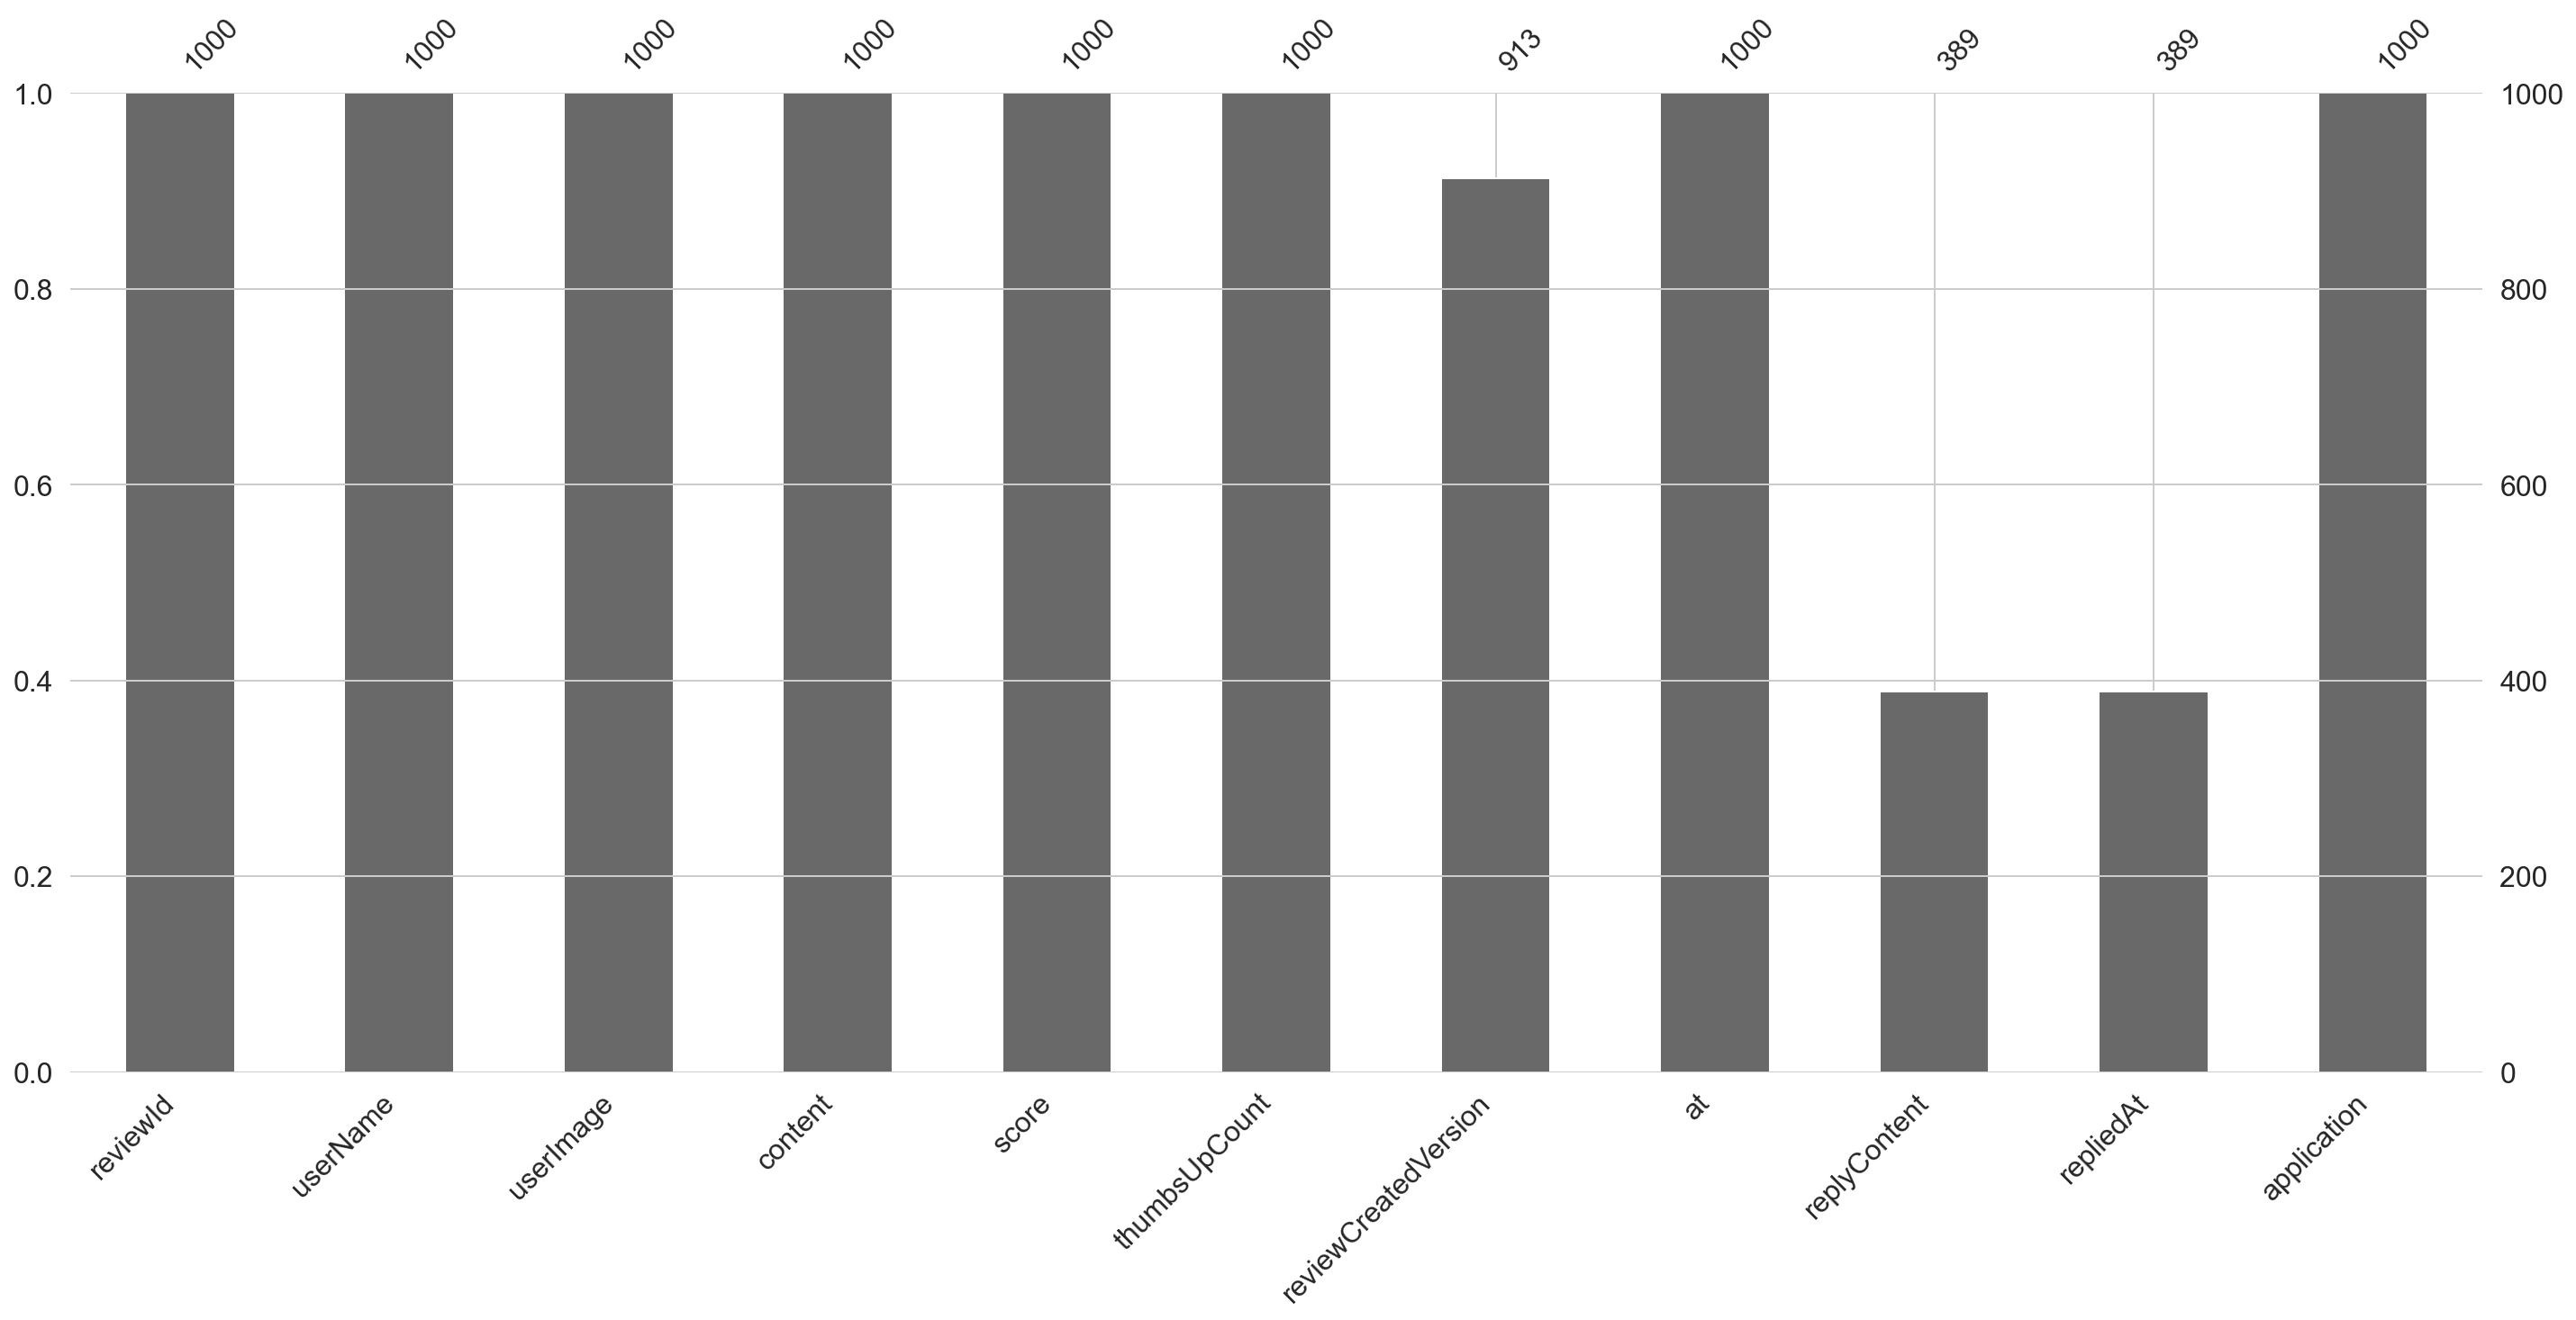

In [20]:
msno.bar(app_reviews_df.sample(1000))

In [21]:
#reviewCreatedVersion is almost 10% of the data... for now 'am going to fill in with a . to keep the data numeric'
#just want to preview the data to make sure there are no obvious patterns in them... 
missingvers = app_reviews_df.loc[app_reviews_df['reviewCreatedVersion'].isna()]
missingvers.head()

reviewId        userName  \
3894  gp:AOqpTOHHzVfRFFx02_pboUPgl9auLUiPOjcRtTfQXWk...     Boat Smitty   
3923  gp:AOqpTOH1fNkpwyGGdI7nsB2Lp3oM7BSHtyGy66_WrW_...       Riru Isla   
3924  gp:AOqpTOFsITLloZrPfhSYK_A9s5dmo2VegsxXKhVo7uQ...   Niall Goddard   
3926  gp:AOqpTOE8Eb6zN0PndR2BzsNiX8Eom3fZsVgwjpRZ9kd...  Brazil Uluwita   
3935  gp:AOqpTOG1tmYDVVVvP7SaL9Q0PWG_ygEwpzGShKTeJHW...      Meagan Lai   

                                              userImage  \
3894  https://lh3.googleusercontent.com/a-/AOh14GgYD...   
3923  https://lh3.googleusercontent.com/a-/AOh14GhI0...   
3924  https://lh3.googleusercontent.com/a-/AOh14Gg9H...   
3926  https://lh3.googleusercontent.com/a-/AOh14GiiV...   
3935  https://lh3.googleusercontent.com/-__XjWddWJNI...   

                                                content  score  thumbsUpCount  \
3894  I struggle with anxiety and depression (as man...      5              0   
3923  The idea is great, but don't let the Facebook ...      2              0   
3924  Well, it's a big shame. This app looked really...      1              0   
3926  I downloaded this application and immediately ...      1              0   
3935  Won't let me cancel subscription. I signed up ...      1              0   

     reviewCreatedVersion                  at replyContent repliedAt  \
3894                 None 2020-06-21 10:52:55         None       NaT   
3923                 None 2020-06-16 21:19:43         None       NaT   
3924                 None 2020-06-29 09:39:59         None       NaT   
3926                 None 2020-07-09 08:59:47         None       NaT   
3935                 None 2020-06-22 21:37:51         None       NaT   

           application  
3894  com.calm.android  
3923  com.calm.android  
3924  com.calm.android  
3926  com.calm.android  
3935  com.calm.android

In [22]:
app_reviews_df['reviewCreatedVersion'].fillna('.', inplace=True)

In [23]:
#creating a field to indicate whether or not someone replied to a review
app_reviews_df['replied'] = app_reviews_df['replyContent'].notnull()
app_reviews_df['replied'].value_counts()

False    30504
True     19496
Name: replied, dtype: int64

In [24]:
app_reviews_df['replyContent'].fillna('n/a', inplace=True)
app_reviews_df['repliedAt'].fillna('_', inplace=True)

In [25]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 4.2+ MB


### Dropping columns: 

In [26]:
#there are no reviewIds that are duplicated, see no value so dropping
app_reviews_df['reviewId'].duplicated().value_counts()

False    50000
Name: reviewId, dtype: int64

In [27]:
app_reviews_df.drop('reviewId', axis=1, inplace=True)

In [28]:
app_reviews_df['userImage'][8]
#not focus of this project so dropping images
app_reviews_df.drop('userImage', axis=1, inplace=True)

In [29]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
userName                50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 3.5+ MB


# Explore

## 👀 A first look at the data: Ratings Across Apps

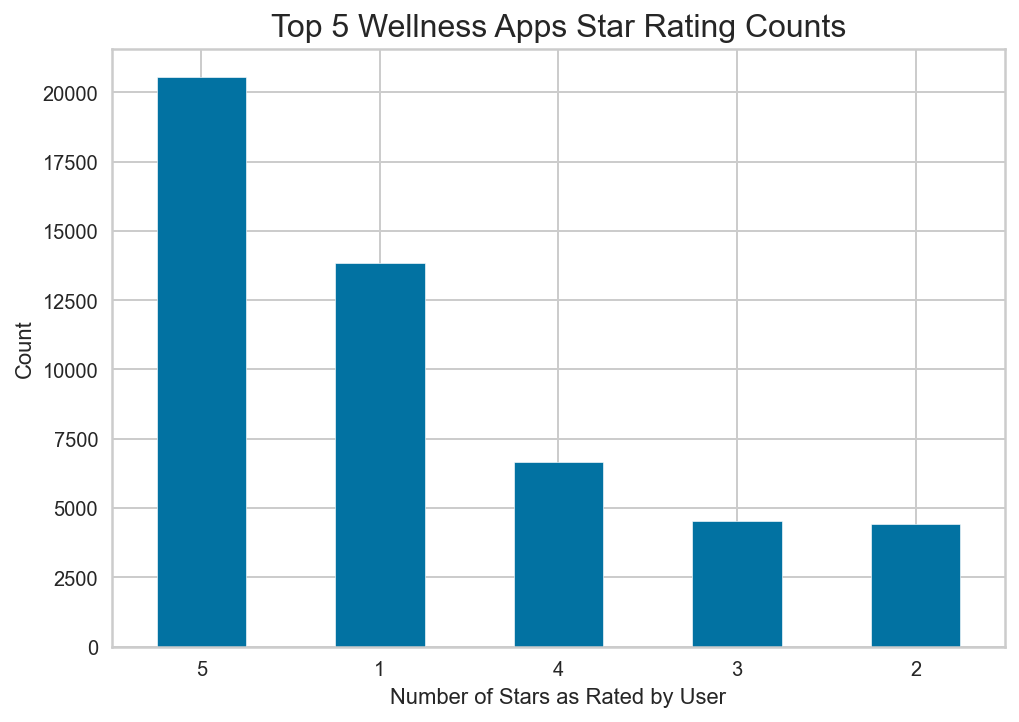

In [88]:
#counting how many reviews fall into each category
app_reviews_df['score'].value_counts().plot(kind='bar')
plt.title('Top 5 Wellness Apps Star Rating Counts', fontsize=16)
plt.xlabel('Number of Stars as Rated by User')
plt.xticks(rotation=0) 
plt.ylabel('Count')
plt.show()

>**Observation:** Top and bottom ratings are the most frequently occuring accross all 5 apps.  Also noting that these categories are the most informative since they are the highest and lowest rated scores. The accompanying content of a review could inform best practice as well as greatest opportunity to improve.

In [31]:
app_reviews_df['application'].value_counts()

com.calm.android                10000
com.fitbit.FitbitMobile         10000
com.gen.workoutme               10000
com.myfitnesspal.android        10000
com.getsomeheadspace.android    10000
Name: application, dtype: int64

### 👀 Comparing Apps in Terms of Ratings:

In [32]:
#creating a dataframe for each app for potential future use
calm_df = app_reviews_df[app_reviews_df['application'] == 'com.calm.android']
fitpal_df = app_reviews_df[app_reviews_df['application'] == 'com.myfitnesspal.android']
me_df = app_reviews_df[app_reviews_df['application'] == 'com.gen.workoutme']
headspace_df = app_reviews_df[app_reviews_df['application'] == 'com.getsomeheadspace.android']
fitbit_df = app_reviews_df[app_reviews_df['application'] == 'com.fitbit.FitbitMobile']

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
# fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,9))

# for app in app_reviews_df['application'].unique():
#     app.value_counts().plot(kind='bar', title=app)

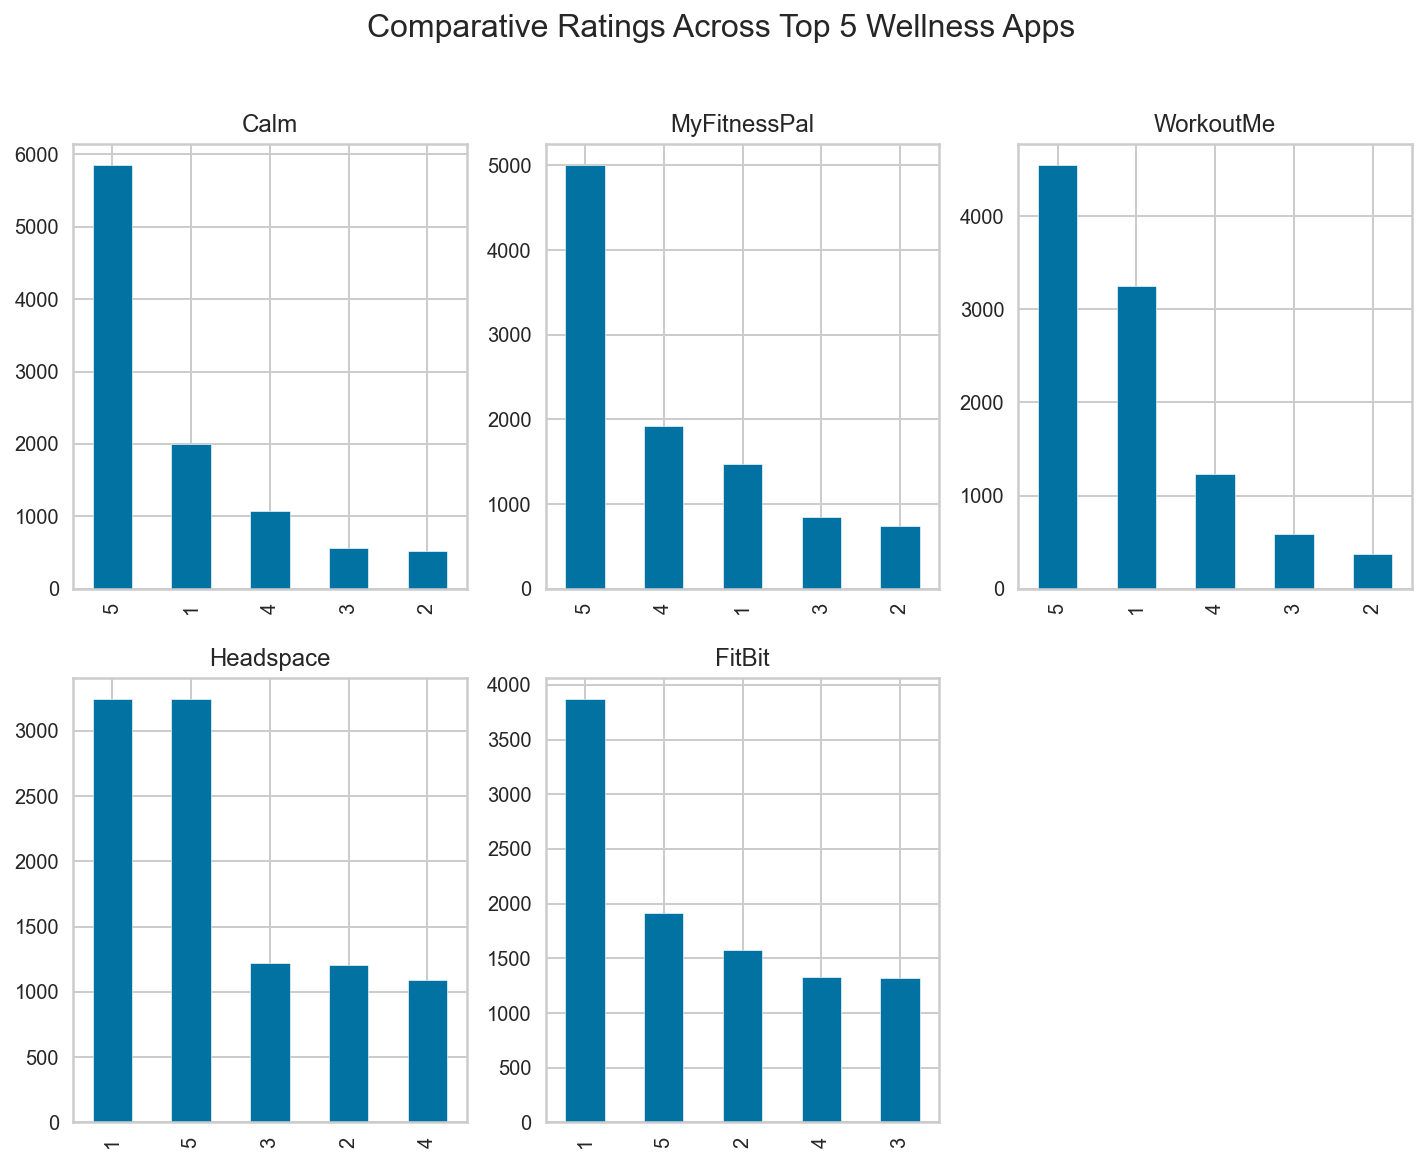

In [100]:
#comparing each app in terms of ratings(need to clean code see subsequent cells)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
calm_df['score'].value_counts().plot(kind='bar',ax=axs[0][0], title='Calm')
fitpal_df['score'].value_counts().plot(kind='bar', ax=axs[0][1], title='MyFitnessPal')
me_df['score'].value_counts().plot(kind='bar', ax=axs[0][2], title='WorkoutMe')
headspace_df['score'].value_counts().plot(kind='bar', ax=axs[1][0], title='Headspace')
fitbit_df['score'].value_counts().plot(kind='bar', ax=axs[1][1], title='FitBit')
fig.delaxes(ax=axs[1][2])

fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)

for ax in axs:
plt.show()


>**Observation:** Interesting comparing mediations... Calm has more than 2X 5 star ratings and headspace has almost equal 1* and 5* ratings!?! Fitbit has a majority count of 1* ratings?? AND is among top grossing apps? need to look at versions....(and up my coding game to better document and not look so noobie)

In [33]:
app_reviews_df.head()

userName                                            content  score  \
0      Nathan T.  Not sure why the low reviews. But this is a re...      5   
1  Sarah O'Brien  I signed up for the yearly service, which was ...      1   
2   crissy verce  This app is actually causing more stress. I've...      1   
3          Jason  I like all if the different categories to choo...      2   
4      Glenneroo  Can't even try the app without creating a logi...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
0            146                 4.29 2020-07-07 21:05:20          n/a   
1            420                 4.29 2020-07-06 20:35:19          n/a   
2            169                 4.29 2020-07-08 00:27:42          n/a   
3              6                 4.29 2020-07-10 23:34:43          n/a   
4             21                 4.29 2020-07-07 19:32:31          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

### Squeaky wheels get the grease.  Looking into how often a repeat reviewer gets replied to.

In [106]:
#creating a copy database for eda
df = app_reviews_df.copy()

In [107]:
#Hypothesising replyContent is in response to reviews - probably bad ones - isolating only those with replyContent:
df1 = df[df['replyContent']!='n/a']

In [108]:
df1['score'].value_counts(normalize=True)

1    0.460300
5    0.244666
2    0.126693
3    0.089454
4    0.078888
Name: score, dtype: float64

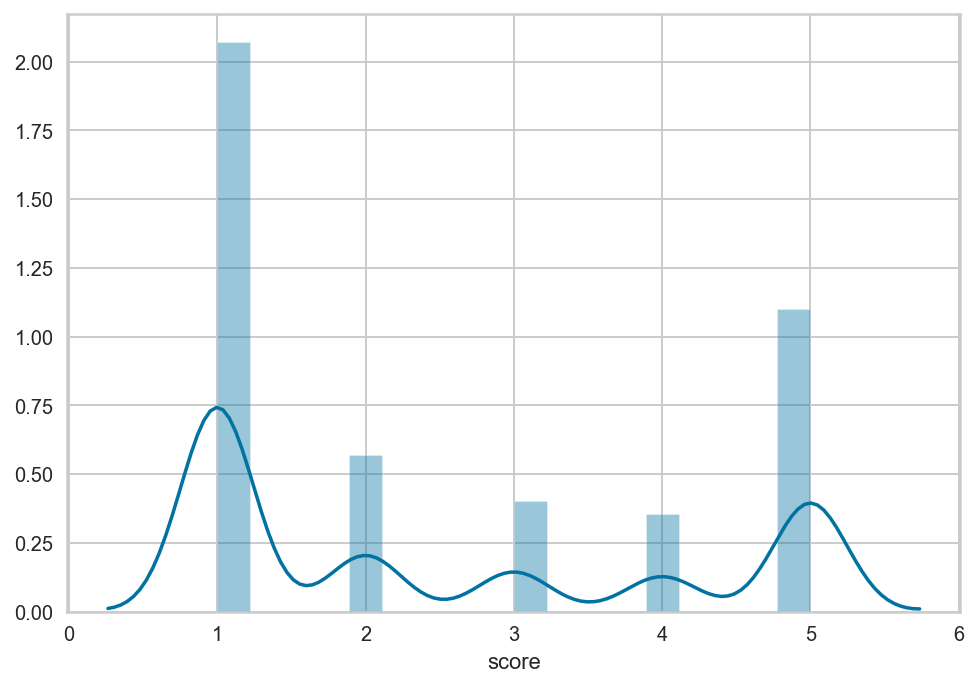

In [109]:
reply_content_counts = df1['score']
sns.distplot(reply_content_counts)

**Majority (~ 46%) scores for replyContent response are 1 star reviews...  confirms hypothesis that this field is in response to poor reviews see examples below, but also gives insight that responses also occur for most positive comments as well (24%)**

### 👀 NEEDS DEV: Which app replies more?

Rating: 5 stars


com.gen.workoutme               4541
com.getsomeheadspace.android      96
com.fitbit.FitbitMobile           60
com.myfitnesspal.android          55
com.calm.android                  18
Name: application, dtype: int64


--------
Rating: 1 stars


com.gen.workoutme               3248
com.getsomeheadspace.android    1883
com.myfitnesspal.android        1323
com.fitbit.FitbitMobile         1313
com.calm.android                1207
Name: application, dtype: int64


--------
Rating: 2 stars


com.getsomeheadspace.android    721
com.myfitnesspal.android        642
com.fitbit.FitbitMobile         533
com.gen.workoutme               377
com.calm.android                197
Name: application, dtype: int64


--------
Rating: 3 stars


com.getsomeheadspace.android    658
com.gen.workoutme               586
com.fitbit.FitbitMobile         471
com.myfitnesspal.android         18
com.calm.android                 11
Name: application, dtype: int64


--------
Rating: 4 stars


com.gen.workoutme               1234
com.fitbit.FitbitMobile          133
com.getsomeheadspace.android      92
com.myfitnesspal.android          64
com.calm.android                  15
Name: application, dtype: int64


--------


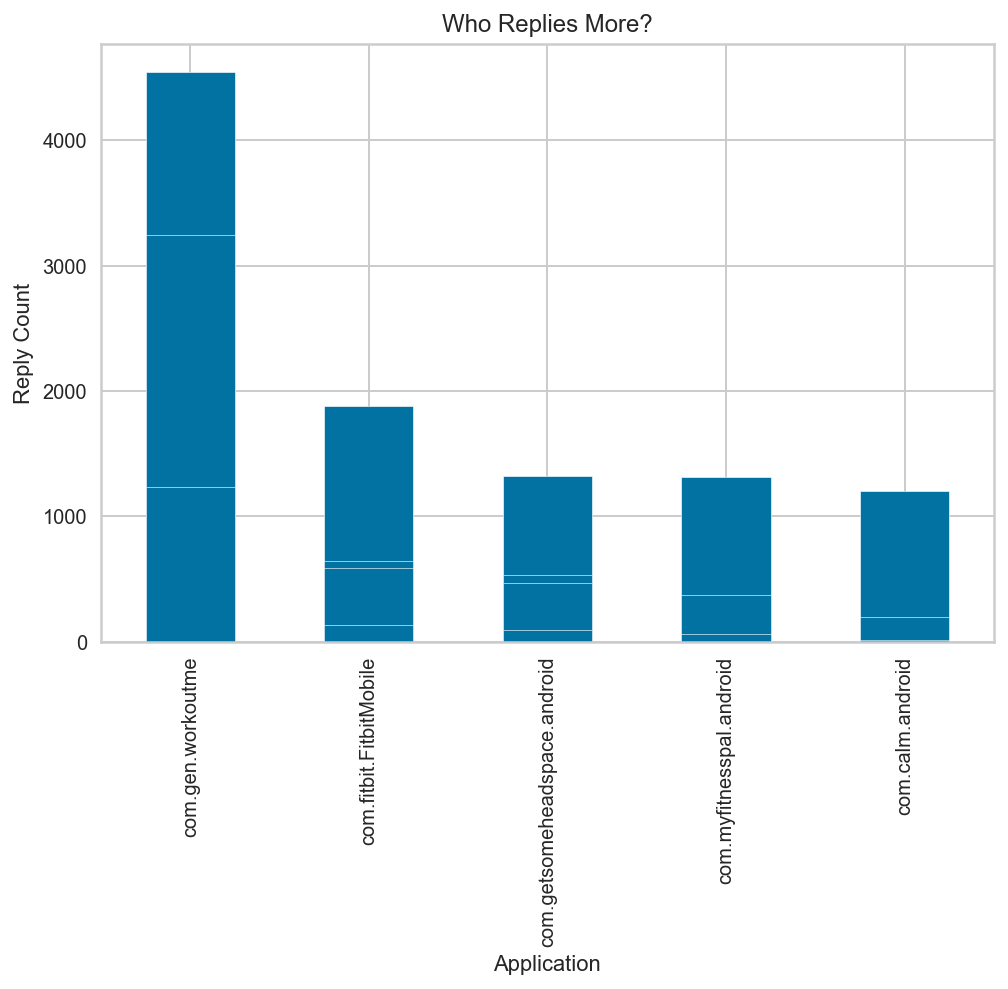

In [188]:
for group in list(df1['score'].unique()):
    reply_count = df1.groupby('score').get_group(group)['application'].value_counts()
    print(f'Rating: {group} stars')
    display(reply_count)
    print()
    print('--------')
    #cmap = {5:'blue', 4:'turquoise', 3:'lightblue', 2:'lightgreen',1:'green' }
    reply_count.plot(kind='bar', title=('Who Replies More?'))
    plt.xlabel('Application')
    plt.ylabel('Reply Count')


### Repeat reviewer:

In [34]:
repeat_comments = app_reviews_df[app_reviews_df.duplicated(['userName','application'], keep=False)].sort_values('userName')
print(f'The set of repeat reviewers is {len(repeat_comments)} rows.')
av_score = round(repeat_comments['score'].mean(),1)
print(f'The average score of repeat reviers is {av_score}')
repeat_comments


The set of repeat reviewers is 1775 rows.
The average score of repeat reviers is 3.5


userName                                            content  \
28758            A D  Disappointed with the direction this app is he...   
27414            A D  Impossible to download anything for offline us...   
20993            A D  Shuts down, over priced confusing subscription...   
27058  A Google user  I like headspace I have started using it but I...   
27383  A Google user  I wouldn't care if they show ads, if at least ...   
...              ...                                                ...   
23104            h k  App has basic billing issues; no one responds ...   
24472              m  Most annoying ads of your app always show up i...   
29761              m  It won't even let me sign up for the app. Ever...   
42113            sal  great app, only one thing that needs sorting w...   
48628            sal  What a load of rubbish. this app use to update...   

       score  thumbsUpCount reviewCreatedVersion                  at  \
28758      1              1                3.6.7 2018-09-15 17:48:10   
27414      1              0               3.27.0 2019-07-18 00:29:59   
20993      1              0               3.57.0 2020-06-17 23:31:05   
27058      5              0               3.17.0 2019-02-19 16:14:19   
27383      2              1                3.7.4 2018-11-02 04:45:09   
...      ...            ...                  ...                 ...   
23104      1              0                    . 2020-04-13 21:27:45   
24472      1             11                3.7.0 2018-09-21 16:14:21   
29761      1              2               3.44.2 2019-12-01 13:31:07   
42113      5              1               3.22.1 2020-06-09 00:33:27   
48628      1              1                 3.18 2020-04-06 00:15:56   

                                            replyContent            repliedAt  \
28758  Hey there,\n\nThanks for sharing your thoughts...  2018-09-16 11:18:35   
27414  Thank you for reaching out. We are sorry for t...  2019-07-18 04:42:40   
20993                                                n/a                    _   
27058                                                n/a                    _   
27383                                                n/a                    _   
...                                                  ...                  ...   
23104                                                n/a                    _   
24472                                                n/a                    _   
29761                                                n/a                    _   
42113                                                n/a                    _   
48628                                                n/a                    _   

                        application  replied  
28758  com.getsomeheadspace.android     True  
27414  com.getsomeheadspace.android     True  
20993  com.getsomeheadspace.android    False  
27058  com.getsomeheadspace.android    False  
27383  com.getsomeheadspace.android    False  
...                             ...      ...  
23104  com.getsomeheadspace.android    False  
24472  com.getsomeheadspace.android    False  
29761  com.getsomeheadspace.android    False  
42113       com.fitbit.FitbitMobile    False  
48628       com.fitbit.FitbitMobile    False  

[1775 rows x 10 columns]

In [189]:
repeat_comments['userName'].value_counts()

A Google user       1334
M                      7
Sarah                  6
Sam                    6
Anna                   5
                    ... 
Abhishek Patel         2
Audrey Streeting       2
Julia                  2
J                      2
Scorpion               2
Name: userName, Length: 198, dtype: int64

In [116]:
repeat_comments.loc[42113]['content']

"great app, only one thing that needs sorting when someone requests you as a friend you have two options accept or ignore. when you ignore them the app still accepts them as your friend. please fix !! The app has also started to freeze or can't load another person account please fix..."

In [117]:
repeat_comments.loc[48628]['content']

"What a load of rubbish. this app use to update without location on. Why do I need the location? Even when it's on it doesn't sync properly if at all. Searching for device. Takes ages. Loosing a customer here unless you fix it. I no longer get notifications from messages or calls. WASTE OF MONEY!!! Do not get ONE! EDIT still not syncing at all. Searches for device all day long. Rediculous app. 6th April... This thing gets worse. Its so hit and miss. Not syncing sleep or hr. Sort it out."

In [104]:
repeat_comments['wasrepliedto'] = repeat_comments['replyContent']!='n/a'

In [111]:
round(repeat_comments['wasrepliedto'].value_counts(normalize=True),2)

False    0.57
True     0.43
Name: wasrepliedto, dtype: float64

In [43]:
df1.head()

userName                                            content  score  \
0      Nathan T.  Not sure why the low reviews. But this is a re...      5   
1  Sarah O'Brien  I signed up for the yearly service, which was ...      1   
2   crissy verce  This app is actually causing more stress. I've...      1   
3          Jason  I like all if the different categories to choo...      2   
4      Glenneroo  Can't even try the app without creating a logi...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
0            146                 4.29 2020-07-07 21:05:20          n/a   
1            420                 4.29 2020-07-06 20:35:19          n/a   
2            169                 4.29 2020-07-08 00:27:42          n/a   
3              6                 4.29 2020-07-10 23:34:43          n/a   
4             21                 4.29 2020-07-07 19:32:31          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

In [44]:
#pd.set_option('display.max_colwidth', -1)

userImage - can drop - not relevant to this work

In [47]:
#trying to simplify code..and failing
# list_of_dfs = [calm_df, fitpal_df, me_df, headspace_df, fitbit_df]
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar')

In [48]:
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar',title='df')
#     fig.delaxes(ax=axs[1][2])
#     ax.get_subplotspec().rowspan.start
#     fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)

### Versions

In [49]:
#looking for various app versions to perhaps evauluate ratings based on version improvements? 
#245 versions between the 5 apps
app_reviews_df['reviewCreatedVersion'].value_counts()

.          4698
3.21       1909
20.7.0     1836
20.11.1    1415
20.10.0    1306
           ... 
4.0.2         1
3.0           1
2.1.2         1
3.4.1         1
2.4.2         1
Name: reviewCreatedVersion, Length: 250, dtype: int64

Comparing highest rated and lowest rated fitness-baesd apps by version count:

In [50]:
#Isolating myfitnesspal app to see how many versions: 15 
app_reviews_df.groupby('application').get_group('com.myfitnesspal.android')['reviewCreatedVersion'].value_counts()

20.7.0     1836
20.11.1    1415
20.10.0    1306
20.6.1     1158
20.9.0     1157
20.2.1      929
20.1.0      656
20.6.0      429
20.5.0      400
20.3.0      270
20.4.1      151
20.12.0     148
20.11.0     125
20.8.0       16
20.4.0        4
Name: reviewCreatedVersion, dtype: int64

In [51]:
app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()

3.21      1909
3.23      1169
3.24      1108
3.20       917
3.19.1     789
3.22.1     767
3.19.2     752
3.18       639
3.13       506
3.14       413
3.16       357
3.17       283
3.15       232
3.25       105
3.22        47
3.19         7
Name: reviewCreatedVersion, dtype: int64

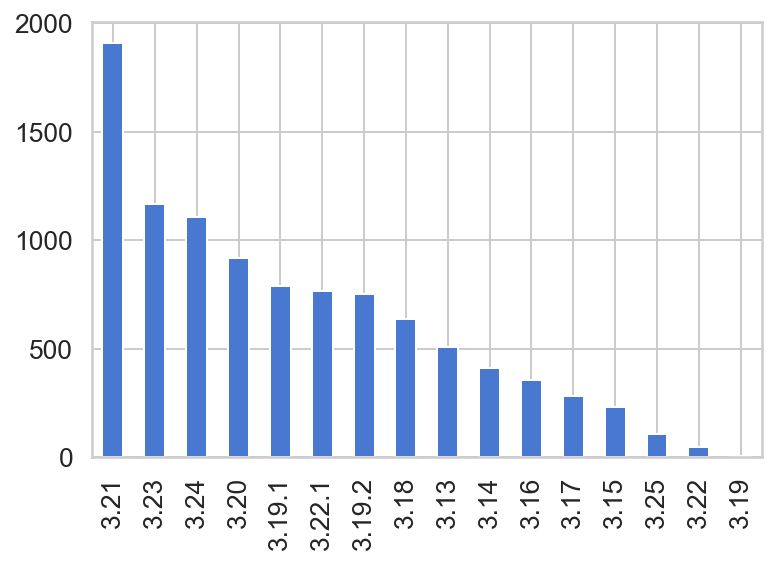

In [52]:
#Isolating fitbit app to see how many versions: 17 
app_version_fitbit = app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()
app_version_fitbit.plot(kind='bar')

In [53]:
#!pip install interact


In [54]:
# Clean this up to look at versions...
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### 👀 Version Comparison 

In [377]:
@interact(x=list(app_reviews_df['application'].unique()))
def plt_compare(x):
    fig = plt.figure(figsize=(10,8))
    count = len(app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].unique())
    app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].hist(bins='auto')
    plt.xlabel('Version')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, fontsize=6) 
    print(f'Version Count : {count}')

interactive(children=(Dropdown(description='x', options=('com.calm.android', 'com.myfitnesspal.android', 'com.…

In [56]:
import plotly.express as px

# WHY does this look funny?

In [241]:
fitbit_df.head()

userName                                            content  \
40000  Sabrina Persaud  The app itself works fine for me, no major gli...   
40001   Lourdes Zalcik  The movements of my arm are used to calculate ...   
40002      Donna Jones  Normally it works fabulously, but since Tuesda...   
40003   darren hayward  Great app for keeping track of everything, sle...   
40004    Beckie Mobley  Very disappointed. Spent aloft of money on a w...   

       score  thumbsUpCount reviewCreatedVersion                  at  \
40000      3             81                 3.25 2020-07-09 12:52:30   
40001      4             13                 3.25 2020-07-10 13:57:13   
40002      5              9                 3.25 2020-07-10 17:08:34   
40003      4              1                 3.25 2020-07-11 01:23:50   
40004      1              2                 3.25 2020-07-10 18:45:09   

      replyContent repliedAt              application  replied  
40000          n/a         _  com.fitbit.FitbitMobile    False  
40001          n/a         _  com.fitbit.FitbitMobile    False  
40002          n/a         _  com.fitbit.FitbitMobile    False  
40003          n/a         _  com.fitbit.FitbitMobile    False  
40004          n/a         _  com.fitbit.FitbitMobile    False

In [386]:
px.scatter(fitbit_df, x='reviewCreatedVersion', y='score')

In [246]:
calm_df.head()

userName                                            content  score  \
0      Nathan T.  Not sure why the low reviews. But this is a re...      5   
1  Sarah O'Brien  I signed up for the yearly service, which was ...      1   
2   crissy verce  This app is actually causing more stress. I've...      1   
3          Jason  I like all if the different categories to choo...      2   
4      Glenneroo  Can't even try the app without creating a logi...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
0            146                 4.29 2020-07-07 21:05:20          n/a   
1            420                 4.29 2020-07-06 20:35:19          n/a   
2            169                 4.29 2020-07-08 00:27:42          n/a   
3              6                 4.29 2020-07-10 23:34:43          n/a   
4             21                 4.29 2020-07-07 19:32:31          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

In [249]:
calm_df['reviewCreatedVersion'].value_counts()

.         1243
4.18.1     815
4.19       726
4.20       445
4.25.1     399
          ... 
3.1.2        1
2.7.5        1
3.0          1
3.14         1
3.8.2        1
Name: reviewCreatedVersion, Length: 74, dtype: int64

In [388]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=headspace_df['reviewCreatedVersion'], y=headspace_df['score'],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        size=[40, 60, 80, 100],
    )
)])

fig.show()

## Whats in a review?

In [58]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aosika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
#creating a df to 'clean' the content 
clean_df = df.copy()

In [60]:
# clean_df['content'] = clean_df['content'].apply(lambda x: ' '.join([w.lower() for w in w.split() if w not in (stopwords_list)]))

# clean_df['content']

In [418]:
def clean_freq(text):
    '''A pre-processing function that cleans text of stopwords, punctuation and capitalization, tokenizes, lemmatizes
    then finds the most frequently used 100 words
    
    text - the text to be cleaned in string format'''

    # Get all the stop words in the English language
    from nltk.corpus import stopwords
    #importing additional functions to execute
    import string
    from nltk import FreqDist
    #importing and enstantiating lemmatizer 
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    stopwords_list = stopwords.words('english')

    #remove punctuation
    stopwords_list += list(string.punctuation)
    ##adding adhoc all strings that don't appear to contribute, added 'article, page and wikipedia' iteratively as 
    ##these are parts of most comment strings
    stopwords_list += ("''","``", "'s", "\\n\\n" , '...', 'i\\','\\n',
                       '•', "i", 'the', "'m", 'i\\', "'ve", "don\\'t",
                      "'re", "\\n\\ni", "it\\", "'ll", 'you\\', "'d", "n't",
                      '’', 'app') 
    
    from nltk import word_tokenize
    tokens = word_tokenize(text)
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    freqdist = FreqDist(stopped_tokens)
    most_common_stopped = freqdist.most_common(100)
    return most_common_stopped

In [417]:
def clean_tokens(text):
    '''A pre-processing function that cleans text of stopwords, punctuation and capitalization, tokenizes, lemmatizes
    then finds the most frequently used 100 words
    
    text - the text to be cleaned in string format'''

    # Get all the stop words in the English language
    from nltk.corpus import stopwords
    #importing additional functions to execute
    import string
    from nltk import FreqDist
    #importing and enstantiating lemmatizer 
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    stopwords_list = stopwords.words('english')

    #remove punctuation
    stopwords_list += list(string.punctuation)
    ##adding adhoc all strings that don't appear to contribute, added 'article, page and wikipedia' iteratively as 
    ##these are parts of most comment strings
    stopwords_list += ("''","``", "n't", 'app', "...", "n't",
                       "wa","ve", "ha","'", 'wa', 'ha') 
  
    
    from nltk import word_tokenize
    tokens = word_tokenize(text)
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    return stopped_tokens

In [63]:
from wordcloud import WordCloud

In [398]:
text = str(list(clean_df['content']))

In [65]:
freq_clean = clean_freq(text)
#removed the word app, as it is obvious and was most frequent by 6X the next most freqent word (36901 cases)
#removing the word

In [66]:
freq_clean

[('wa', 7765),
 ('free', 7401),
 ('use', 7293),
 ('time', 7240),
 ('love', 6793),
 ('day', 6727),
 ('get', 6518),
 ('like', 6364),
 ('ha', 6331),
 ('really', 6191),
 ('sleep', 6126),
 ('great', 6050),
 ('fitbit', 5866),
 ('meditation', 5821),
 ('help', 5484),
 ('good', 5317),
 ('would', 5255),
 ('work', 5142),
 ('even', 4653),
 ('keep', 3996),
 ('one', 3958),
 ('pay', 3922),
 ('subscription', 3874),
 ('doe', 3749),
 ('year', 3674),
 ('sync', 3674),
 ('food', 3669),
 ('update', 3549),
 ('calm', 3405),
 ('phone', 3366),
 ('track', 3352),
 ('much', 3338),
 ('ca', 3277),
 ('need', 3158),
 ('calorie', 3079),
 ('also', 3062),
 ('using', 3050),
 ('issue', 3027),
 ('want', 3023),
 ('thing', 2936),
 ('every', 2925),
 ('money', 2917),
 ('make', 2903),
 ('trial', 2804),
 ('easy', 2785),
 ('way', 2768),
 ('try', 2742),
 ('used', 2729),
 ('still', 2720),
 ('tried', 2604),
 ('could', 2541),
 ('premium', 2444),
 ('month', 2441),
 ('exercise', 2411),
 ('find', 2377),
 ('well', 2345),
 ('option', 2324)

In [399]:
clean_toks = clean_tokens(text)

### 👀 Wordcloud: all apps, all reviews

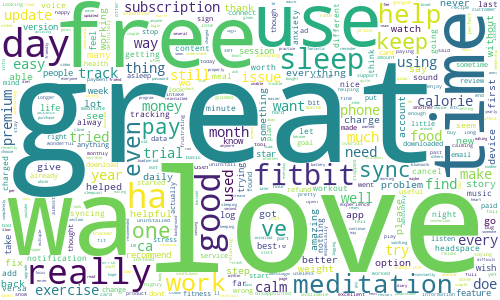

In [400]:

wordcloud = WordCloud(width=500, height=300,background_color="white", max_words=5000, 
                      contour_width=3, collocations=False, contour_color='red')

wordcloud.generate(','.join(clean_toks))

wordcloud.to_image()


>This could be informative for highest and lowest rating

In [71]:
def clean_comment(comment):
    '''Lemmatizes, removes capitalization, punctuation and 'stopwords' from the lemmatized tokens,
    returns data in the dataframe for modeling in a "clean" state
    
    comment - a text string'''
    
    import string
    #splitting sentences into tokens
    tokens = comment.split()
    
    #instantiating Lemmatizer and lemmatizing words
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    stopwords_list = stopwords.words('english')
    stopwords_list += ("''","``", ".", 'app') 

    #remove punctuation, capitalization, and stopwords
    stopwords_list += list(string.punctuation)
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    
    return ' '.join(stopped_tokens)



In [72]:
clean_df['content'] = clean_df['content'].apply(clean_tokens)

clean_df['content']

0        [sure, low, review, really, good, around, 's, ...
1        [signed, yearly, service, wa, supposed, charge...
2        [actually, causing, stress, 've, subscribed, p...
3        [like, different, category, choose, however, f...
4        [ca, even, try, without, creating, login, insi...
                               ...                        
49995    [like, ha, offer, doe, sync, easily, info, tak...
49996                           [often, problem, synching]
49997                        [great, keeping, step, sleep]
49998                 [one, sync, issue, great, otherwise]
49999                       [great, fit, bit, first, came]
Name: content, Length: 50000, dtype: object

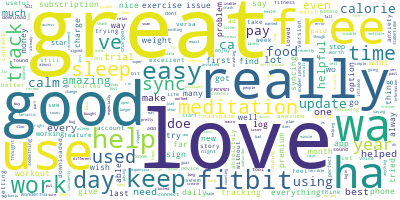

In [73]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='steelblue')

wordcloud.generate(clean_df['content'].to_string())

wordcloud.to_image()

In [ ]:
## Observation on 'good': words like great, really, good, and love are obvious and not informative, nor is wa, or ha

In [74]:
import timestamp

going to look at timespan, 

In [75]:
import plotly.express as px

In [76]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [77]:
plt.style.use('seaborn-notebook')

# Model

Using the 'clean_df' content to model since it's been lemmatized, and stopwords have been removed, including 'app' which was used 6X more than any other word.

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
clean_df.head()

userName                                            content  score  \
0      Nathan T.  [sure, low, review, really, good, around, 's, ...      5   
1  Sarah O'Brien  [signed, yearly, service, wa, supposed, charge...      1   
2   crissy verce  [actually, causing, stress, 've, subscribed, p...      1   
3          Jason  [like, different, category, choose, however, f...      2   
4      Glenneroo  [ca, even, try, without, creating, login, insi...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
0            146                 4.29 2020-07-07 21:05:20          n/a   
1            420                 4.29 2020-07-06 20:35:19          n/a   
2            169                 4.29 2020-07-08 00:27:42          n/a   
3              6                 4.29 2020-07-10 23:34:43          n/a   
4             21                 4.29 2020-07-07 19:32:31          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

## Preprocessing

>Since the best in class '5 Stars' and worst in class '1 Star' reviews is what would be most informative, the data will be categorized as such: 'Good' is rated 5 Stars, 'Bad' was rated 1 Star, and 'Neutral' will be 2-4 stars.

In [80]:
stars_dict = {5:'good', 4:'neutral', 3: 'neutral', 2:'neutral', 1:'bad'}
clean_df['Target'] = clean_df['score'].map(stars_dict)

In [81]:
#!pip install yellowbrick

In [194]:
good_clean_df = clean_df[clean_df['Target']=='good']

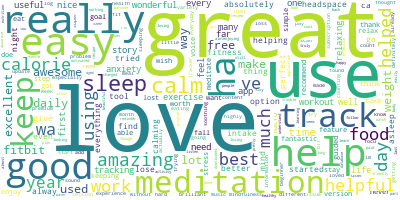

In [195]:
gcwordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='steelblue')

gcwordcloud.generate(good_clean_df['content'].to_string())

gcwordcloud.to_image()

>**Observation**: words like 'love', 'great', 'good' are obvious and not very informative, am dropping a few to render more meaningful word cloud

In [369]:
def good_clean_tokens(text):
    '''A pre-processing function that cleans text of stopwords, punctuation and capitalization, tokenizes, lemmatizes
    then finds the most frequently used 100 words
    
    text - the text to be cleaned in string format'''

    # Get all the stop words in the English language
    from nltk.corpus import stopwords
    #importing additional functions to execute
    import string
    from nltk import FreqDist
    #importing and enstantiating lemmatizer 
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    stopwords_list = stopwords.words('english')

    #remove punctuation
    stopwords_list += list(string.punctuation)
    ##adding adhoc all strings that don't appear to contribute, added 'love, great, good, really, amazing' iteratively as 
    ##these are parts of most comment strings
    stopwords_list += ("''","``", "n't", 'app', 'love', 'great', 'good', 'really', 'wa', 'ha',
                     '...', "'s", 'amazing', 've', 'excellent', 'awesome', 'wonderful', 'fantastic', "ve") 
  
    
    from nltk import word_tokenize
    tokens = word_tokenize(text)
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    return stopped_tokens

In [370]:
#pulling it back together so can further clean less meaningful words:
good_clean_df['content'] = good_clean_df['content'].apply(lambda x: ' '.join(x))

In [371]:
good_clean_df['content'] = good_clean_df['content'].apply(good_clean_tokens)

### 👀 High Rated WordCloud

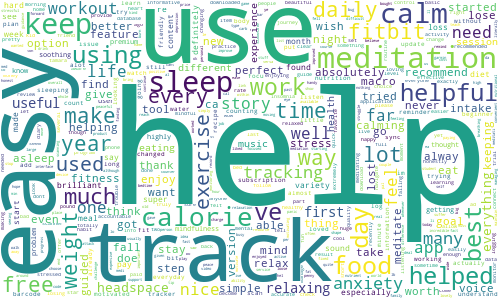

In [372]:

gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(good_clean_df['content'].to_string())

gcwordcloud.to_image()



In [373]:
goodcleantext =  str(list(good_clean_df['content']))

In [375]:
good_freq_clean = clean_freq(goodcleantext)

### 👀 Low Rated WordCloud

In [196]:
bad_clean_df = clean_df[clean_df['Target']=='bad']

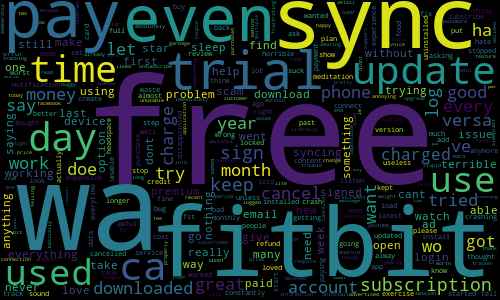

In [404]:
bcwordcloud = WordCloud(width=500, height=300, background_color="black", 
                        max_words=5000, contour_width=3, collocations=False, 
                        contour_color='steelblue')

bcwordcloud.generate(bad_clean_df['content'].to_string())

bcwordcloud.to_image()

In [451]:
#pulling it back together so can further clean less meaningful words:
bad_clean_df['content'] = bad_clean_df['content'].apply(lambda x: ' '.join(x))

In [452]:
btfidf_vectorizer = TfidfVectorizer()
btfidf = btfidf_vectorizer.fit_transform(bad_clean_df['content'])

In [454]:
bkmeans5 = KMeans(n_clusters=5).fit(btfidf)

In [460]:
#making a copy of the bad_clean_df to do some clustering analysis
bad_df = bad_clean_df.copy()

In [461]:
bad_df['5cluster'] = bkmeans5.labels_

In [463]:
bad_df['5cluster'].value_counts()

1    7088
3    2939
0    1812
4    1020
2     984
Name: 5cluster, dtype: int64

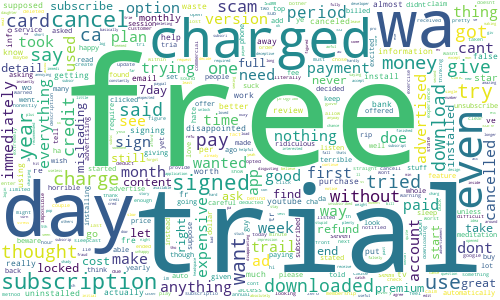

In [464]:
fivebadcluster0 = bad_df[bad_df['5cluster']== 0]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster0['content'].to_string())

gcwordcloud.to_image()

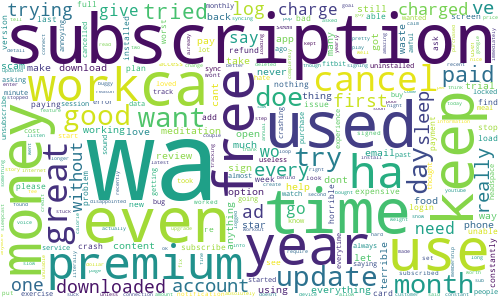

In [465]:
fivebadcluster1 = bad_df[bad_df['5cluster']== 1]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster1['content'].to_string())

gcwordcloud.to_image()

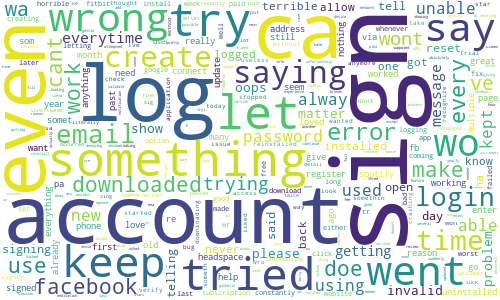

In [466]:
fivebadcluster2 = bad_df[bad_df['5cluster']== 2]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster2['content'].to_string())

gcwordcloud.to_image()

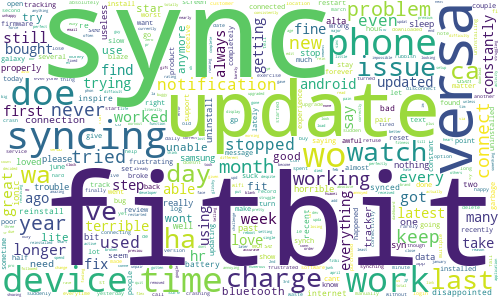

In [467]:
fivebadcluster3 = bad_df[bad_df['5cluster']== 3]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster3['content'].to_string())

gcwordcloud.to_image()

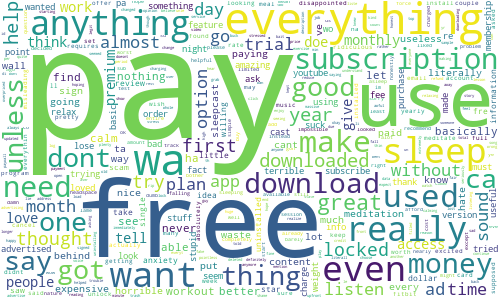

In [468]:
fivebadcluster4 = bad_df[bad_df['5cluster']== 4]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivebadcluster4['content'].to_string())

gcwordcloud.to_image()

In [462]:
bad_df.head()

userName                                            content  score  \
1  Sarah O'Brien  signed yearly service wa supposed charged end ...      1   
2   crissy verce  actually causing stress 've subscribed premium...      1   
4      Glenneroo  ca even try without creating login inside feat...      1   
5            E A  love love fact signed 7 day free trial nothing...      1   
8         Mars F  generally like 's rather buggy example even th...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
1            420                 4.29 2020-07-06 20:35:19          n/a   
2            169                 4.29 2020-07-08 00:27:42          n/a   
4             21                 4.29 2020-07-07 19:32:31          n/a   
5             11                 4.29 2020-07-09 04:48:11          n/a   
8            117                 4.29 2020-07-08 10:11:15          n/a   

  repliedAt       application  replied Target  5cluster  
1         _  com.calm.android    False    bad         0  
2         _  com.calm.android    False    bad         1  
4         _  com.calm.android    False    bad         0  
5         _  com.calm.android    False    bad         0  
8         _  com.calm.android    False    bad         1

### Baseline Values: 

In [198]:
clean_df['Target'].value_counts(dropna=True, normalize=True)

good       0.41108
neutral    0.31206
bad        0.27686
Name: Target, dtype: float64

In [199]:
#pulling the strings back together
clean_df['content'].apply(lambda x: ' '.join(x))

0        sure low review really good around 's entirely...
1        signed yearly service wa supposed charged end ...
2        actually causing stress 've subscribed premium...
3        like different category choose however find ta...
4        ca even try without creating login inside feat...
                               ...                        
49995    like ha offer doe sync easily info take long t...
49996                               often problem synching
49997                             great keeping step sleep
49998                       one sync issue great otherwise
49999                             great fit bit first came
Name: content, Length: 50000, dtype: object

In [200]:
X = clean_df['content'].apply(lambda x: ' '.join(x))
y = clean_df['Target']

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=8)

In [203]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

## Various Classification Models, Multi NB, LinearSVC, LogReg

https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

 Laplace smoothing , which is a technique for smoothing categorical data. A small-sample correction, or pseudo-count, will be incorporated in every probability estimate. Consequently, no probability will be zero. this is a way of regularizing Naive Bayes, and when the pseudo-count is zero, it is called Laplace smoothing. While in the general case it is often called Lidstone smoothing.

In [204]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB(alpha=6)),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report, accuracy_score
y_pred = nb.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.73
              precision    recall  f1-score   support

         bad       0.77      0.69      0.73      4144
        good       0.76      0.93      0.83      6144
     neutral       0.63      0.50      0.56      4712

    accuracy                           0.73     15000
   macro avg       0.72      0.71      0.71     15000
weighted avg       0.72      0.73      0.72     15000



In [205]:
scaler = nb.named_steps['tfidf']
classifier = nb.named_steps['clf']



In [206]:
classifier.coef_

array([[ -8.72094325,  -9.51055346,  -9.96512906, ..., -10.05435379,
        -10.05435379, -10.05435379],
       [ -9.83166169,  -9.31309177, -10.10831841, ..., -10.07795486,
        -10.07795486, -10.07795486],
       [ -9.49735443,  -9.65807445, -10.0794448 , ..., -10.0794448 ,
        -10.0794448 , -10.0794448 ]])

# Remember to run this to get feature names

In [207]:
scaler.get_feature_names()

['00',
 '000',
 '00000',
 '00for',
 '00pm',
 '01',
 '01march',
 '02',
 '021',
 '03',
 '04',
 '05',
 '06',
 '06082020',
 '07',
 '08',
 '09',
 '0and',
 '0sec',
 '0wa55157ew2157902',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000000',
 '1000x',
 '100aud',
 '100cad',
 '100e',
 '100g',
 '100lbs',
 '100rs',
 '100x',
 '101',
 '1010rs',
 '102',
 '103g',
 '104',
 '105',
 '10500',
 '108',
 '108mb',
 '10day',
 '10ft',
 '10g',
 '10gb',
 '10gbp',
 '10hrs',
 '10k',
 '10kg',
 '10kgs',
 '10km',
 '10lb',
 '10lbs',
 '10m',
 '10mbps',
 '10miles',
 '10min',
 '10mins',
 '10minute',
 '10months',
 '10pm',
 '10pounds',
 '10s',
 '10seconds',
 '10th',
 '10times',
 '10x',
 '10yrs',
 '11',
 '110',
 '1100',
 '1100kcal',
 '111minutes',
 '112',
 '113',
 '113g',
 '114',
 '1143',
 '116bpm',
 '119',
 '11am',
 '11days',
 '11g',
 '11k',
 '11lbs',
 '11pm',
 '11th',
 '12',
 '120',
 '1200',
 '12000',
 '1200cals',
 '120bpm',
 '120kcal',
 '120lbs',
 '120min',
 '1230',
 '124',
 '125',
 '126',
 '127',
 '1290',
 '12a',
 

theorized that the best model for nlp is Linear Support Vector Machine..
https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [221]:
from sklearn.svm import LinearSVC

lSVC = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(dual=False, random_state=42, max_iter=5)),
               ])
lSVC.fit(X_train, y_train)


y_pred = lSVC.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.75
              precision    recall  f1-score   support

         bad       0.73      0.79      0.76      4144
        good       0.80      0.90      0.85      6144
     neutral       0.68      0.52      0.59      4712

    accuracy                           0.75     15000
   macro avg       0.74      0.74      0.73     15000
weighted avg       0.74      0.75      0.74     15000



In [233]:
lSVCscaler = lSVC.named_steps['tfidf']
lSVCclassifier = lSVC.named_steps['clf']

In [236]:
feats = lSVCscaler.get_feature_names()

In [ ]:
plot_coefficients()

from https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

In [228]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    cv = CountVectorizer()
    cv.fit(data)
    print(len(cv.vocabulary_))
    print(cv.get_feature_names())
    X_train = cv.transform(data)
    
    svm = LinearSVC()
    svm.fit(X_train, target)
    plot_coefficients(svm, cv.get_feature_names())


In [235]:
lSVC = LinearSVC(dual=False, random_state=42, max_iter=5)

In [237]:
plot_coefficients(lSVC,feats )

AttributeError: 'LinearSVC' object has no attribute 'coef_'

In [210]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='modified_huber', penalty='l2',alpha=.001, random_state=42, max_iter=6, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.75
              precision    recall  f1-score   support

         bad       0.72      0.79      0.76      4144
        good       0.79      0.91      0.85      6144
     neutral       0.68      0.49      0.57      4712

    accuracy                           0.75     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.74      0.75      0.74     15000



In [ ]:
X_train.describe()

In [ ]:
X_train.isnull().sum()

In [ ]:
y_train.describe()

In [ ]:
y_train.isna().sum()

In [211]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5))])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7201333333333333
              precision    recall  f1-score   support

         bad       0.72      0.72      0.72      4144
        good       0.80      0.85      0.82      6144
     neutral       0.60      0.54      0.57      4712

    accuracy                           0.72     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.71      0.72      0.72     15000



In [ ]:
stop

# CLUSTERING:

Reference on KElbowVisualiser
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette score, the mean silhouette coefficient for all samples or the calinski_harabasz score, which computes the ratio of dispersion between and within clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

>**WARNING**: FIRST VISUALIZER TAKES 2 HOURS TO RUN, SECOND TAKES 1

Result from KElbowVisualizer using distortion metric indicates 5 clusters, and silhouette indicates 6

In [84]:
import yellowbrick
from sklearn.feature_extraction.text import TfidfVectorizer

In [213]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

clean_content = clean_df['content'].apply(lambda x: ' '.join(x))

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(clean_content)

tf_words = tfidf.get_feature_names()

In [86]:
len(tfidf.vocabulary_)

20322

Default metric for KElbowVisualizer is *Distortion score* which is calcluated by computing the sum of squared distances from each point to its assigned center

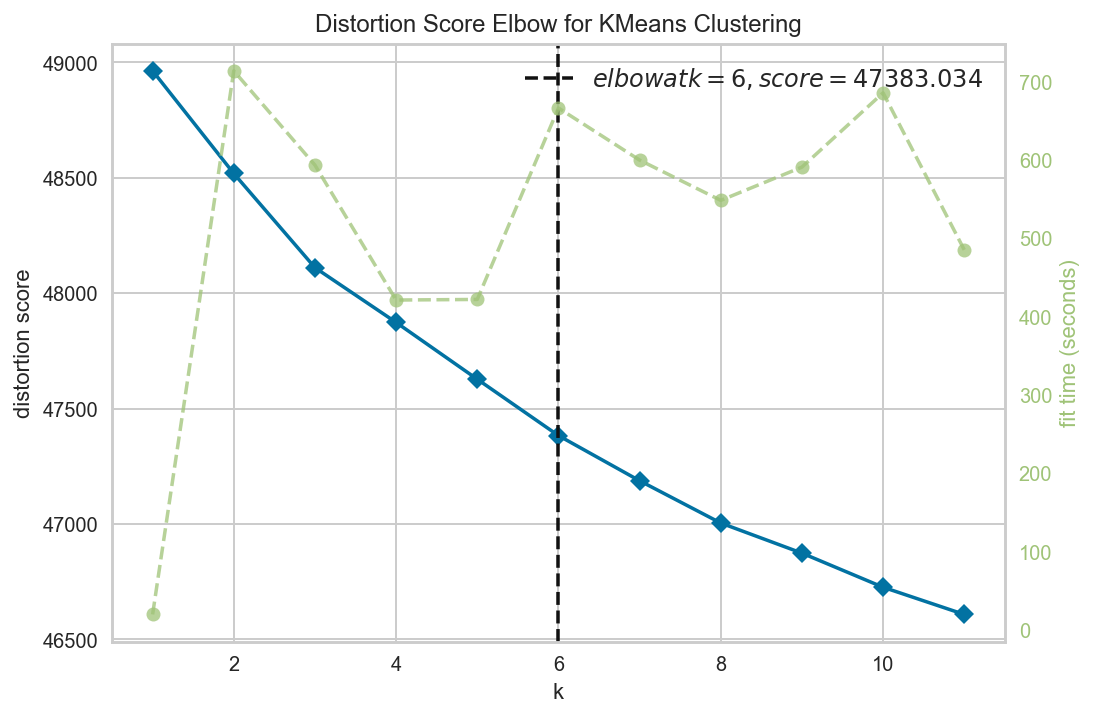

In [87]:

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)
visualizer.show()

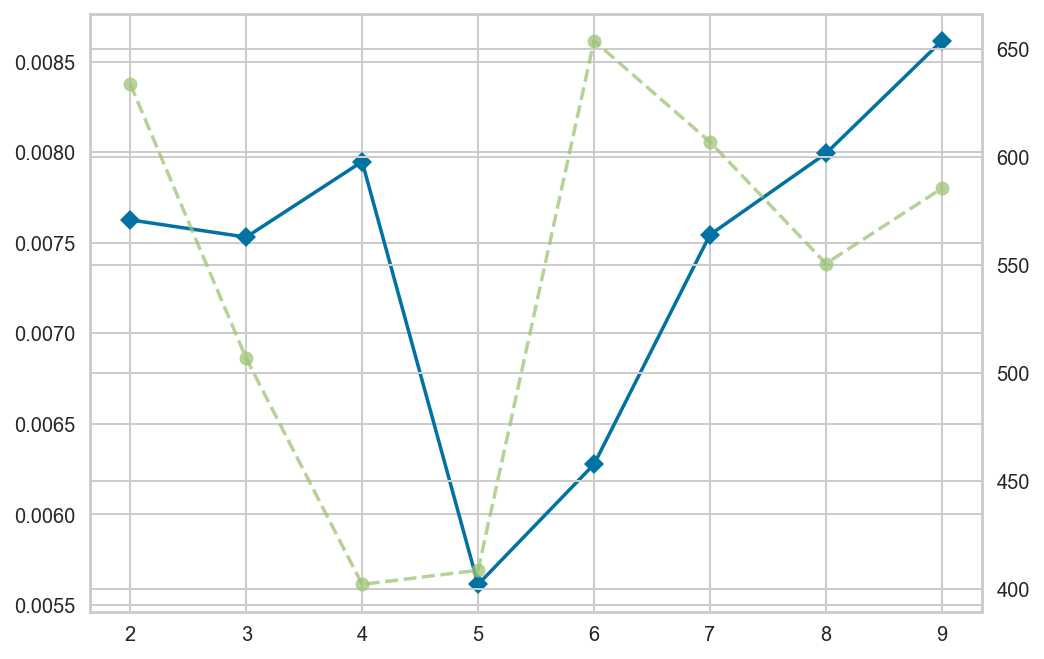

In [214]:
model1 = KMeans(random_state=0)
visualizer1 = KElbowVisualizer(model1, metric='silhouette', k=(2,10))

visualizer1.fit(X)
visualizer.show()

## KMeans models: 5 clusters v 6 clusters

In [257]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(X_train)



In [259]:
kmeans = KMeans(n_clusters=5).fit(tfidf)

In [260]:
preds = kmeans.predict(tfidf_vectorizer.transform(X_test))

In [271]:
X_train

47568                 able sync watch 2 day since update 😕
27299    issue payment emailed help centre got back le ...
2327     hopefully future affordable available people m...
17078    would like able track step calorie burned acco...
25828    membership listen 99 video/music like going me...
                               ...                        
10376    exercise connected apps show logged via browse...
34949    due medical reason continue programme ... sinc...
18417                             take long time sync step
25940    created account basic meditation way day 4 try...
4547                                 love different option
Name: content, Length: 35000, dtype: object

In [272]:
xtrain = pd.DataFrame(X_train)

In [286]:
xtrain['5cluster'] = kmeans.labels_

In [289]:
#xtrain.drop('cluster',axis=1, inplace=True)

In [405]:
xtrain.head()

content  6cluster  5cluster
47568               able sync watch 2 day since update 😕         4         4
27299  issue payment emailed help centre got back le ...         3         4
2327   hopefully future affordable available people m...         3         4
17078  would like able track step calorie burned acco...         3         1
25828  membership listen 99 video/music like going me...         5         2

In [302]:
fivecluster1 = xtrain[xtrain['5cluster']== 1]

In [413]:
type(fivecluster1)

pandas.core.frame.DataFrame

In [299]:
from nltk import FreqDist

In [304]:
fivecluster1['content']

17078    would like able track step calorie burned acco...
15286    great way track food easily scan barcodes info...
8612     love- makes easy meditate every day best guide...
47266                      love keep track every time move
35338                                        love improved
                               ...                        
12955    easy use struggle disordered eating even set g...
45884    great keeps track key diagnosing afib 45 pound...
13397    great tracking calorie bug asks set long-term ...
14189    great keeping track 're eating whether losing ...
4547                                 love different option
Name: content, Length: 4401, dtype: object

In [429]:
clean_freq(fivecluster1text)

[('love', 1569),
 ('easy', 1522),
 ('use', 1164),
 ('track', 1129),
 ('great', 908),
 ('calorie', 814),
 ('keep', 704),
 ('food', 703),
 ('help', 568),
 ('really', 474),
 ('tracking', 316),
 ('good', 288),
 ('weight', 260),
 ('helpful', 258),
 ('intake', 255),
 ('exercise', 225),
 ('ha', 217),
 ('way', 192),
 ('make', 189),
 ('like', 185),
 ('daily', 161),
 ('fitbit', 151),
 ('using', 149),
 ('keeping', 147),
 ('much', 141),
 ('macro', 137),
 ('work', 132),
 ('sleep', 131),
 ('helped', 128),
 ('fitness', 125),
 ('day', 113),
 ('eating', 113),
 ('eat', 111),
 ('workout', 108),
 ('useful', 108),
 ('step', 103),
 ('goal', 103),
 ('stay', 102),
 ('excellent', 101),
 ('scan', 99),
 ('lot', 99),
 ('everything', 98),
 ('need', 93),
 ('find', 89),
 ('meal', 88),
 ('count', 86),
 ('well', 85),
 ('counting', 84),
 ('get', 84),
 ('tool', 84),
 ('many', 79),
 ('also', 78),
 ('water', 77),
 ('lose', 77),
 ('would', 76),
 ('feature', 76),
 ('free', 75),
 ('able', 74),
 ('far', 74),
 ('awesome', 73),

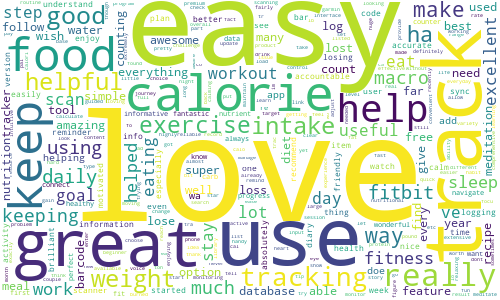

In [442]:
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster1['content'].to_string())

gcwordcloud.to_image()

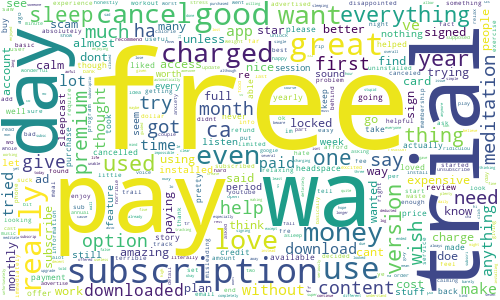

In [444]:
fivecluster2 = xtrain[xtrain['5cluster']== 2]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster2['content'].to_string())

gcwordcloud.to_image()

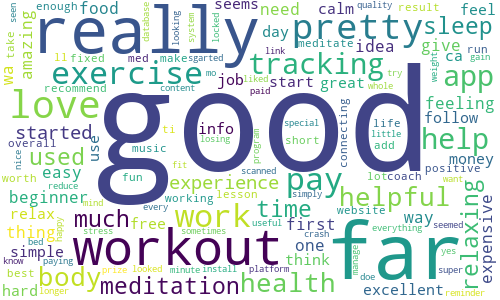

In [445]:
fivecluster3 = xtrain[xtrain['5cluster']== 3]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster3['content'].to_string())

gcwordcloud.to_image()

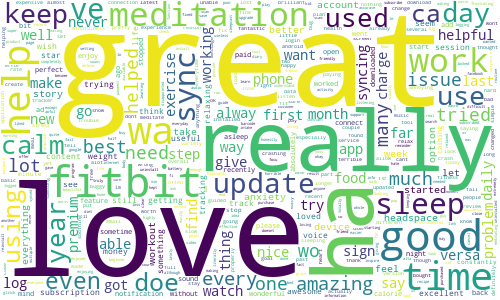

In [446]:
fivecluster4 = xtrain[xtrain['5cluster']== 4]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster4['content'].to_string())

gcwordcloud.to_image()

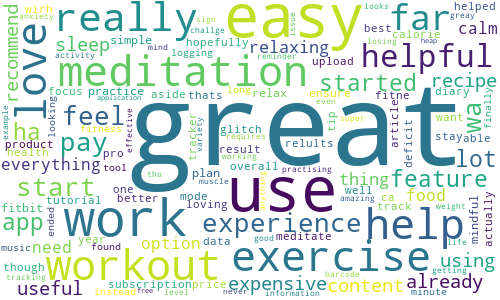

In [447]:
fivecluster0 = xtrain[xtrain['5cluster']== 0]
gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(fivecluster0['content'].to_string())

gcwordcloud.to_image()

# Good, clean clusters

TypeError: 'list' object is not callable

In [281]:
kmeans6 = KMeans(n_clusters=6).fit(tfidf)

In [282]:
xtrain['6cluster'] = kmeans6.labels_

In [295]:
xtrain['5cluster'].value_counts()

4    24555
2     5127
1     4401
3      533
0      384
Name: 5cluster, dtype: int64

In [285]:
xtrain['6cluster'].value_counts()

3    21916
5     5329
4     5064
1     1823
0      532
2      336
Name: 6cluster, dtype: int64

In [292]:
xtrain.head()

content  6cluster  5cluster
47568               able sync watch 2 day since update 😕         4         4
27299  issue payment emailed help centre got back le ...         3         4
2327   hopefully future affordable available people m...         3         4
17078  would like able track step calorie burned acco...         3         1
25828  membership listen 99 video/music like going me...         5         2

In [269]:
kmeans.labels_

array([4, 4, 4, ..., 4, 4, 1])

In [262]:
preds

array([4, 2, 4, ..., 4, 2, 4])

In [264]:
from collections import Counter, defaultdict


In [265]:
print(Counter(.labels_))

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [261]:
# kmean = Pipeline([('tfidf', TfidfVectorizer()),
#                 ('KMeans', KMeans(6)),
#                ])
# kmean.fit(X_train, y_train)


# y_pred = kmean.predict(X_test)

# print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
# print(classification_report(y_test, y_pred))

In [ ]:
# import sklearn.metrics as metrics

# ks = range (1,12)
# inertia = []


# for k in ks:
#     model1 = KMeans(n_clusters=k)
#     model1.fit(X)
#     inertia.append(model.inertia_)
    
# plt.plot(ks, inertia)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.xticks(ks)
# plt.show()

https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d

In [ ]:
#Label Encode and save for inverse_transform

#create a dictionary
encoders = {}

for col in cat_cols:
    #Instanciate labelencoder
    encoders[col] = LabelEncoder()
    #encode the categorical data
    df[col] = encoders[col].fit_transform(df[col])

df(cat_cols)

In [ ]:
col_nans = df.isna().sum(axis=0)
col_nans

In [ ]:
df1 = app_reviews_df.copy()

In [ ]:
df1.head()

In [458]:
def five_cluster_wrdcld():
    for cluster in list(xtrain['5cluster'].unique()):
        clust_df = xtrain[xtrain['5cluster']==cluster]

        wrdcld5 = WordCloud(width=400, height=200, background_color="white", 
                            max_words=5000, contour_width=3, collocations=False, 
                            contour_color='steelblue')
        wrdcld5.generate(clust_df['content'].to_string())
        clustwrdcld = wrdcld5.to_image()
        print(f'Cluster {cluster} WordCloud:')
        return clustwrdcld
    
    
    

Cluster4 WordCloud:


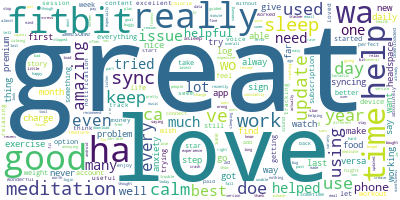

In [459]:
five_cluster_wrdcld()